# Advanced Analytics em um dataset usando a linguagem R 

In [1]:
# Import do dataset e tranformando valores vazios em NA para trata-los no futuro
fin <- read.csv('Future-500.csv', na.strings=c(""))

In [2]:
head(fin,3)

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,Over-Hex,Software,2006,25,TN,Franklin,"$9,684,527","1,130,700 Dollars",8553827,19%
2,Unimattax,IT Services,2009,36,PA,Newtown Square,"$14,016,543","804,035 Dollars",13212508,20%
3,Greenfax,Retail,2012,NA,SC,Greenville,"$9,746,272","1,044,375 Dollars",8701897,16%


In [3]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: int  2006 2009 2012 2011 2013 2013 2009 2013 2009 2010 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14 18 12 NA 26 16 ...


In [4]:
summary(fin)

       ID                        Name                   Industry  
 Min.   :  1.0   Abstractedchocolat:  1   IT Services       :146  
 1st Qu.:125.8   Abusivebong       :  1   Health            : 86  
 Median :250.5   Acclaimedcirl     :  1   Software          : 64  
 Mean   :250.5   Admitruppell      :  1   Financial Services: 54  
 3rd Qu.:375.2   Admonishbadelynge :  1   Construction      : 50  
 Max.   :500.0   Ahemparticular    :  1   (Other)           : 98  
                 (Other)           :494   NA's              :  2  
   Inception      Employees           State              City    
 Min.   :1999   Min.   :   1.00   CA     : 57   San Diego  : 13  
 1st Qu.:2009   1st Qu.:  27.25   VA     : 50   New York   : 11  
 Median :2011   Median :  56.00   TX     : 47   Reston     : 10  
 Mean   :2010   Mean   : 148.61   FL     : 34   Houston    :  9  
 3rd Qu.:2012   3rd Qu.: 126.00   MD     : 25   Austin     :  8  
 Max.   :2014   Max.   :7125.00   (Other):283   Minneapolis:  8  
 N

In [5]:
# non-factor to factor
fin$ID <- factor(fin$ID)

In [6]:
# non-factor to factor
fin$Inception <- factor(fin$Inception)
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14

In [7]:
# Tirando caracteres indesejados 
fin$Expenses <- gsub('Dollars','',fin$Expenses)
fin$Expenses <- gsub(',','',fin$Expenses)

fin$Revenue <- gsub(',','',fin$Revenue)
fin$Revenue <- gsub('\\$','',fin$Revenue)

fin$Growth <- gsub('%','',fin$Growth)

str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : chr  "9684527" "14016543" "9746272" "15359369" ...
 $ Expenses : chr  "1130700 " "804035 " "1044375 " "4631808 " ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : chr  "19" "20" "16" "19" ...


In [8]:
# Transformando caracteres indesejados 
fin$Expenses <- as.numeric(fin$Expenses)
fin$Revenue <- as.numeric(fin$Revenue)
fin$Growth <- as.numeric(fin$Growth)

str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : num  9684527 14016543 9746272 15359369 8567910 ...
 $ Expenses : num  1130700 804035 1044375 4631808 4374841 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : num  19 20 16 19 19 22 17 NA 30 20 ...


In [9]:
# Verificar linhas onde existem valores missing/NA
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
14,14,Techline,NA,2006,65,CA,San Ramon,13898119,5470303,8427816,23
15,15,Cityace,NA,2010,25,CO,Louisville,9254614,6249498,3005116,6
17,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
22,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
84,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
267,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20


In [10]:
# Filtrar sem uar o which()
fin[fin$Employees == 45,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
137,137,Toughcare,Retail,2009,45,CA,Burbank,12429629,5796075,6633554,14
183,183,Ittech,IT Services,2013,45,MN,Minneapolis,11133739,6544488,4589251,20
200,200,Lalane,Retail,2003,45,MN,Golden Valley,12461526,4934351,7527175,14
208,208,Countslovenly,Construction,2010,45,FL,Spring Hill,8380367,8213905,166462,10
245,245,Peskyevaluate,IT Services,2010,45,VA,Richmond,13011611,4284410,8727201,23
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
360,360,Remembergabbro,Construction,2012,45,UT,Lindon,10878578,4515112,6363466,12
380,380,Pickyfive,IT Services,2011,45,CO,Denver,14826723,4458447,10368276,26


In [11]:
# Usar o which() para filtrar apenas valores do dataframe que não aparecerem como N/A's
fin[which(fin$Employees == 45),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
137,137,Toughcare,Retail,2009,45,CA,Burbank,12429629,5796075,6633554,14
183,183,Ittech,IT Services,2013,45,MN,Minneapolis,11133739,6544488,4589251,20
200,200,Lalane,Retail,2003,45,MN,Golden Valley,12461526,4934351,7527175,14
208,208,Countslovenly,Construction,2010,45,FL,Spring Hill,8380367,8213905,166462,10
245,245,Peskyevaluate,IT Services,2010,45,VA,Richmond,13011611,4284410,8727201,23
360,360,Remembergabbro,Construction,2012,45,UT,Lindon,10878578,4515112,6363466,12
380,380,Pickyfive,IT Services,2011,45,CO,Denver,14826723,4458447,10368276,26
435,435,Lucrepickled,IT Services,2004,45,VA,Glen Allen,12894933,3512395,9382538,17
487,487,Genusequ,Construction,2007,45,NC,Greensboro,8498464,5741773,2756691,11


In [12]:
# Acha valores missing em uma determinada coluna 
fin[is.na(fin$Expenses),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
17,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


In [13]:
# Removendo linhas com dados missing
fin_backup <- fin # Caso algo dê errado
# Passar de volta para o data frame a coluna selecionada (mas com !, para passar somente os que não são N/A)
fin <- fin[!is.na(fin$Industry),]
head(fin, 20)
# linhas 14 e 15 que continham valor Industry faltando, foram removidas

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
2,2,Unimattax,IT Services,2009,36,PA,Newtown Square,14016543,804035,13212508,20
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
4,4,Blacklane,IT Services,2011,66,CA,Orange,15359369,4631808,10727561,19
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
6,6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,12805452,4626275,8179177,22
7,7,Treslam,Financial Services,2009,116,MO,Clayton,5387469,2127984,3259485,17
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
9,9,Lamtone,IT Services,2009,55,CA,San Ramon,11757018,6482465,5274553,30
10,10,Stripfind,Financial Services,2010,25,FL,Boca Raton,12329371,916455,11412916,20


In [14]:
# Fazendo um Reset do index do dataframe (caso precise )
rownames(fin) <- NULL
tail(fin, 20) # Agora o index vai até 498

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
479,481,Condemnedgenuine,Government Services,2013,28,MD,Silver Spring,8998948,4222422,4776526,6
480,482,Fatsohealth,IT Services,2009,21,SC,Florence,12239406,5665024,6574382,21
481,483,Abusivebong,Construction,2009,8,WI,Oshkosh,8543321,3841435,4701886,7
482,484,Baileycrowd,Health,2014,800,OH,Twinsburg,9366573,3619483,5747090,6
483,485,Foxwml,Health,2011,48,PA,Plymouth Meeting,10072452,8335458,1736994,6
484,486,Serpentineappeals,Financial Services,2013,48,NV,henderson,11673934,1460147,10213787,23
485,487,Genusequ,Construction,2007,45,NC,Greensboro,8498464,5741773,2756691,11
486,488,Fearwhimbrel,Government Services,2013,100,VA,Falls Church,10637944,7238539,3399405,4
487,489,Dwindlecertain,Government Services,2008,566,MD,Germantown,14146990,8289795,5857195,4
488,490,Suckedregister,Retail,2010,100,TX,Houston,11511235,3995152,7516083,10


In [15]:
# Preechendo missing data (antes de preencher)
fin[is.na(fin$State) & fin$City == "New York",]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
377,379,Stovepuck,Retail,2013,73,NA,New York,13814975,5904502,7910473,10


In [16]:
# Preechendo missing data (depois de preencher)
fin[is.na(fin$State) & fin$City == "San Francisco", "State"] <- "CA"
fin[is.na(fin$State) & fin$City == "New York", "State"] <- "NY"
# check
fin[c(11,377),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NY,New York,10597009,7591189,3005820,7
377,379,Stovepuck,Retail,2013,73,NY,New York,13814975,5904502,7910473,10


In [17]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
330,332,Westminster,Financial Services,2010,NA,MI,Troy,11861652,5245126,6616526,15


In [18]:
# Criando variavel para preencher o missing data com a mediana
median_retail <- median(fin[fin$Industry == "Retail", "Employees"], na.rm=TRUE)
median_financial <- median(fin[fin$Industry == "Financial Services", "Employees"], na.rm=TRUE)
median_growth_const <- median(fin[fin$Industry == "Construction", "Growth"], na.rm=TRUE)

In [19]:
# Passando a mediana para os valores N/A
fin[is.na(fin$Employees) & fin$Industry == "Retail", "Employees"] <- median_retail
fin[is.na(fin$Employees) & fin$Industry == "Financial Services", "Employees"] <- median_financial
fin[is.na(fin$Growth) & fin$Industry == "Construction", "Growth"] <- median_growth_const

In [20]:
# Checando retail
fin[3,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,28,SC,Greenville,9746272,1044375,8701897,16


In [21]:
# Checando financial
fin[330,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
330,332,Westminster,Financial Services,2010,80,MI,Troy,11861652,5245126,6616526,15


In [22]:
# Checando growth_Construction
fin[8,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,10


In [23]:
# Criando variavel para preencher o missing data com a mediana( COLUNA Revenue E COM Industry == Construction)
median_rev_const <- median(fin[fin$Industry == "Construction", "Revenue"], na.rm=TRUE)
fin[is.na(fin$Revenue) & fin$Industry == "Construction", "Revenue"] <- median_rev_const

In [24]:
# Criando variavel para preencher o missing data com a mediana( COLUNA Expenses E COM Industry == Construction)
median_exp_const <- median(fin[fin$Industry == "Construction", "Expenses"], na.rm=TRUE)
fin[is.na(fin$Expenses) & fin$Industry == "Construction" & is.na(fin$Profit),"Expenses"] <- median_exp_const

In [25]:
# Passando o resultado de um cálculo para as linhas Profit N/A
fin[is.na(fin$Profit),"Profit"] <- fin[is.na(fin$Profit),"Revenue"] - fin[is.na(fin$Profit),"Expenses"]

In [26]:
# Passando o resultado de um cálculo para as linhas Expenses N/A
fin[is.na(fin$Expenses),"Expenses"] <- fin[is.na(fin$Expenses),"Revenue"] - fin[is.na(fin$Expenses),"Profit"]

In [27]:
install.packages("ggplot2")
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [28]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2


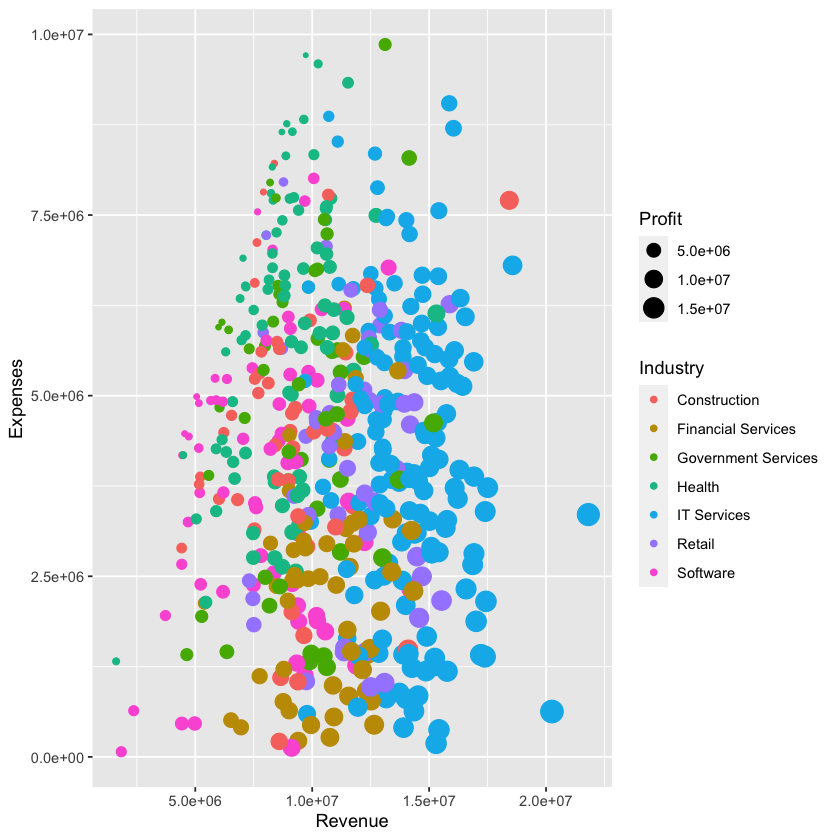

In [29]:
# Visualização dos dados
# Scatterplot classificando por industria, mostrando revenue x expenses, e size = profit
p <- ggplot(data=fin)
p + geom_point(aes(x=Revenue,y=Expenses,
                  color=Industry, size=Profit))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


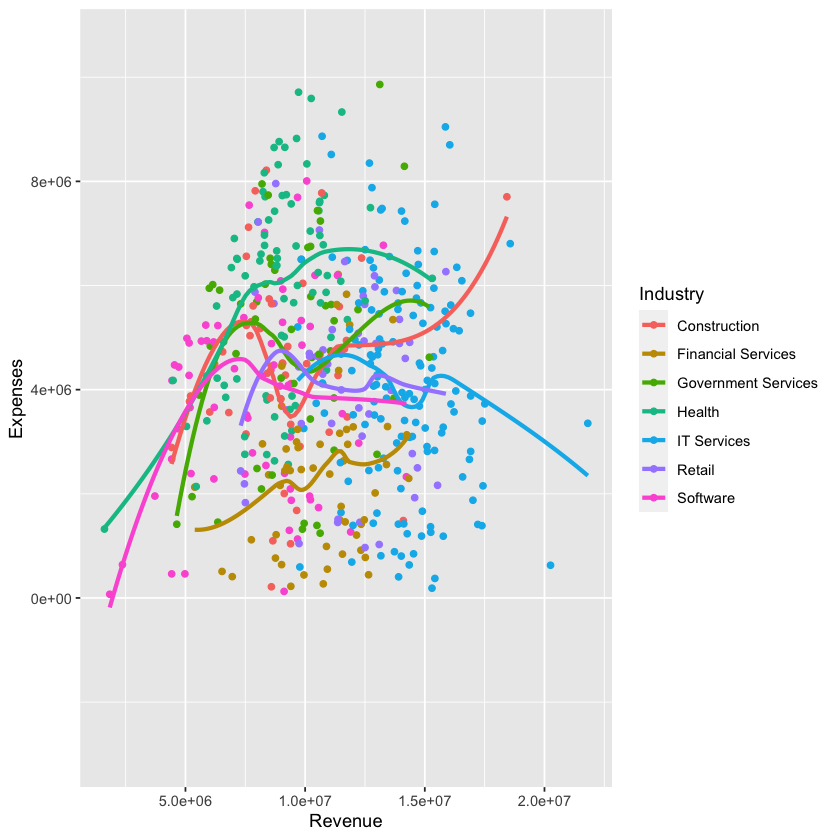

In [30]:
# Scatterplot classificando por industria, mas inclui a relaçao mostrando as tendencias de revenue x expenses
d <- ggplot(data=fin, aes(x=Revenue,y=Expenses,
                  color=Industry))
d + geom_point() + 
    geom_smooth(fill=NA, size=1.2)

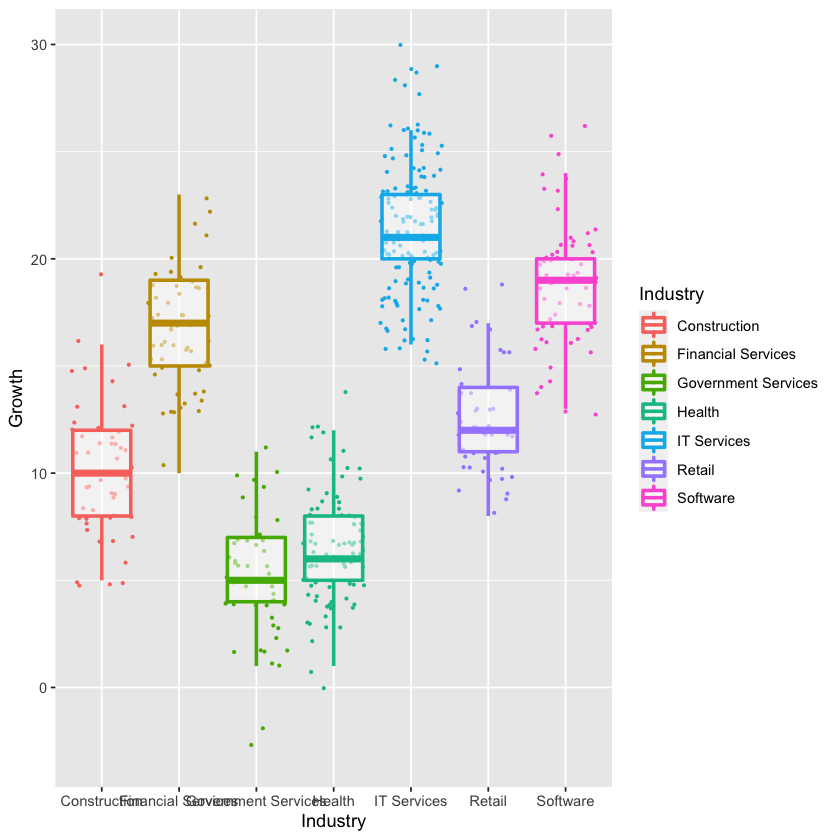

In [31]:
# Boxplot + jitter mostrando os resultados de crescimento por indústria
f <- ggplot(data=fin, aes(x=Industry,y=Growth,
                  color=Industry))
f + geom_jitter(size=0.5) +
geom_boxplot(size=1,alpha=0.5,outlier.color=NA)